In [1268]:
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1269]:
test = pd.read_csv("C:/Users/alvar/Desktop/IPP/Introducción al Machine Learning/M2/Bases/test.csv")
train = pd.read_csv("C:/Users/alvar/Desktop/IPP/Introducción al Machine Learning/M2/Bases/train.csv")

# a) Describir brevementa la cantidad de valores faltantes para cada una de las variables de la base de datos.

In [1270]:
# Tamaño de la base train.

train.shape

(891, 12)

In [1271]:
# Tamaño de la base shape.

test.shape

(418, 11)

In [1272]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1273]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1274]:
# Se observan datos nulos en Age.

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1275]:
# Se observan valores nulos en Age y Fare.

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1276]:
# Cabin presenta un 77% de nulos, por lo que mantenerla no aportará mucho más adelante.

print("Porcentaje de nulos en train")
(train.isna().sum()/len(train)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

Porcentaje de nulos en train


PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.86%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [1277]:
# Cabin presenta un 78% de nulos, por lo que mantenerla no aportará mucho más adelante.

print("Porcentaje de nulos en test")
(test.isna().sum()/len(test)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

Porcentaje de nulos en test


PassengerId      0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            20.57%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare            0.23%
Cabin          78.22%
Embarked         0.0%
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

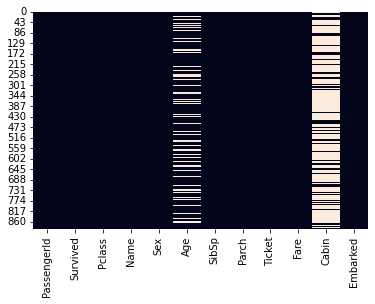

In [1278]:
# Se contabilizan y visualizan los nulos.

display(train.isna().sum())
sns.heatmap(train.isnull(), cbar=False)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

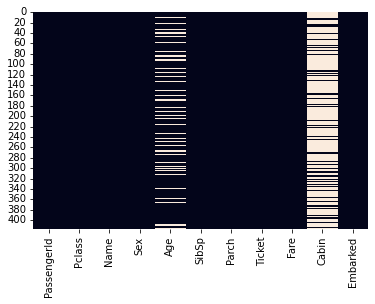

In [1279]:
# Se contabilizan y visualizan los nulos.

display(test.isna().sum())
sns.heatmap(test.isnull(), cbar=False)

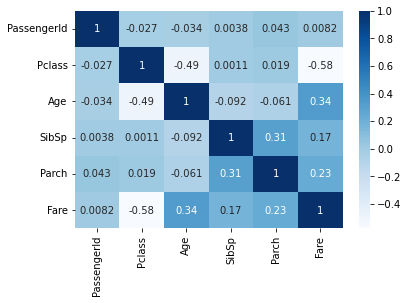

In [1280]:
# Se busca alguna correlación. No se detecta.

sns.heatmap(test.corr(), annot=True, cmap = 'Blues')
plt.show()

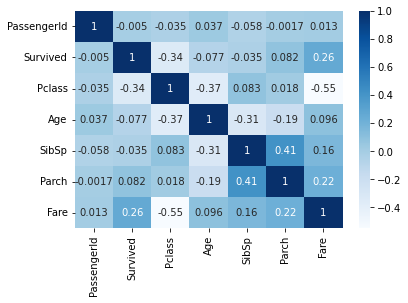

In [1281]:
# Se busca alguna correlación. No se detecta.

sns.heatmap(train.corr(), annot=True, cmap = 'Blues')
plt.show()

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  


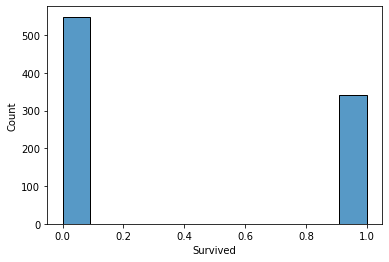

In [1282]:
# Se revisa que no haya sobreajuste.

print(train.groupby(["Survived"]).count())

sns.histplot(x = "Survived", data = train);

In [1283]:
# La proporción de personas que murieron.

549/891

0.6161616161616161

# b) Completar aquellas variables que se encuentran faltantes para las bases de train ("Age", "fare", "Cabin") y test ("Age", "Cabin", "embarked").

In [1284]:
# Se busca la moda de Embarked para luego imputar

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1285]:
# Se imputan los valores de Age con la edad promedio.
mean_train = train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_train)

# Se imputan los valores de Embarked con "S" que es la moda.
train['Embarked'] = train['Embarked'].fillna("S")

# Se elimina Cabin ya que contiene un 77% de datos nulos.
del(train['Cabin'])

In [1286]:
# Se imputan los valores de Age con la edad promedio.
mean_test = test['Age'].mean()
test['Age'] = test['Age'].fillna(mean_test)

# Se imputan los valores de Fare con la tarifa promedio.
mean_test_fare = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean_test_fare)

# Se elimina Cabin ya que contiene un 77% de datos nulos.
del(test['Cabin'])

In [1287]:
# Se separa el género de los pasajeros.

pd.get_dummies(train,columns = ["Sex"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1


In [1288]:
# Se conserva una variable de género.

pd.get_dummies(train,columns = ["Sex"], drop_first = True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,1


In [1289]:
train.drop(["PassengerId", "Name", "Ticket", 'Embarked'], axis = 1, inplace = True)

In [1290]:
train = pd.get_dummies(train, columns = ["Sex"], drop_first = True)

In [1291]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# c) Ajustar el primer modelo de regresión logística.

In [1292]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [1293]:
# La variable explicativa utilizará los valores de clase, edad, familiaridad padre e hijos, familiaridad y el género.
# La variable objetivo será la supervivencia.

feature_cols = ['Pclass', 'Age', 'SibSp','Parch', 'Fare', 'Sex_male']
v_exp = train[feature_cols]
v_obj = train.Survived

In [1294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(v_exp, v_obj, test_size = 0.25, random_state = 0)

In [1295]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# d) Entrenar y determinar el nivel de accuracy del primer modelo.

In [1296]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [1297]:
type(modelo)

sklearn.linear_model._logistic.LogisticRegression

In [1298]:
print('Registros de la base original', train.shape)
print('Registros de la base de entrenamiento',X_train.shape)


Registros de la base original (891, 7)
Registros de la base de entrenamiento (668, 6)


In [1299]:
y_pred = modelo.predict(X_test)

In [1300]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [1301]:
# Se crea matriz de confusión.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  21],
       [ 25,  59]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

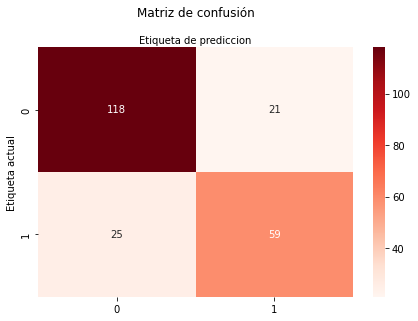

In [1302]:
# Se expresa visualmente.

nombre_clase = [0.1]
fig, ax = plt.subplots()
marcas= np.arange(len(nombre_clase))
plt.xticks(marcas, nombre_clase)
plt.yticks(marcas, nombre_clase)

sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, fmt = 'g',cmap = 'Reds' )
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [1303]:
X_test.shape

(223, 6)

In [1304]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [1305]:
# Se obtiene la Accuracy, Precision, Recall y F1 del modelo.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1:", f1)

Accuracy: 0.7937219730941704
Precision: 0.7375
Recall 0.7023809523809523
F1: 0.7195121951219512


In [1306]:
# Reporte de clasificación.

from sklearn import metrics as mt

print(mt.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       139
           1       0.74      0.70      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [1307]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [1308]:
# Se prepara la base test para predecir resultados con el modelo.

ids = test['PassengerId']
test = test.drop(['PassengerId', 'Name','Ticket','Embarked'],  axis = 1)

pd.get_dummies(test,columns = ["Sex"])
pd.get_dummies(test,columns = ["Sex"], drop_first = True)
test = pd.get_dummies(test, columns = ["Sex"], drop_first = True)

In [1309]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [1311]:
# Se utiliza el modelo de regresión logística para predecir los resultados.

prediccion_test = modelo.predict(test)
out_regresion = pd.DataFrame({'PassengerId': ids, 'Survived': prediccion_test})
print('Predicción Regresión Logística:')
print(out_regresion)

Predicción Regresión Logística:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [1312]:
test

array([[ 0.83012938,  0.35819429, -0.46037161, -0.47720996, -0.48512409,
         0.72705166],
       [ 0.83012938,  1.32315818,  0.40105202, -0.47720996, -0.50151335,
        -1.37541808],
       [-0.36497068,  2.48111485, -0.46037161, -0.47720996, -0.44839451,
         0.72705166],
       ...,
       [ 0.83012938,  0.66698274, -0.46037161, -0.47720996, -0.49657206,
         0.72705166],
       [ 0.83012938,  0.03185048, -0.46037161, -0.47720996, -0.48075994,
         0.72705166],
       [ 0.83012938,  0.03185048,  0.40105202,  0.73949329, -0.19795429,
         0.72705166]])

In [1313]:
# Los resultados son:

viven = out_regresion['Survived'].sum()
print(viven, 'personas sobrevivirían de las 418')

152 personas sobrevivirían de las 418
